# Bank Churn Prediction
## Steps

#### 1. Load and Explore Data
- 1.1. Import necessary libraries.
- 1.2. Load the dataset.
- 1.3. Check the shape of the dataset. Identify the number of duplicate rows.
- 1.4. Assess data quality: identify missing values and % of missing values.
- 1.5. Identify Numerical and Categorical columns and analyze them separately:
  - 1.5.1. Check column names with numerical data types from the dataframe. Count and sort the unique values for each numerical column in descending order.
  - 1.5.2. Retrieve column names with object data types from the dataframe.
  - (Standardize Column Names)
  - 1.5.3. Identify categorical variables from numerical formats, those with less than 20 unique values, and separate them from the rest of the numerical variables.
  - 1.5.4. Categorical variables from object data: Count and sort the unique values for each object (string) column in descending order.
  - 1.5.5. Extract columns with object data types to create a categorical dataframe. Hypothesis: All potential categorical columns from numerical data are categorical.
  - 1.5.6. Adjust the numerical dataframe by removing the moved columns.

#### 2. Pre-process Data
- 2.1. Deal with duplicates.
- 2.2. Standardize column names:
  - 2.2.1. Remove leading and trailing spaces and underscores.
  - 2.2.2. Replace non-alphanumeric characters with underscores.
  - 2.2.3. Convert column names from CamelCase to snake_case.
- 2.3. Correct data types.
- 2.4. Check domain-specific inconsistencies: check for inconsistencies or errors specific to the domain (e.g., unrealistic values, mismatches in categorical data).

#### 3. Univariate Analysis
- 3.1. Categorical variables:
  - 3.1.1. Frequency tables: Counts and proportions.
  - 3.1.2. Visualizations: Bar charts, pie charts.
- 3.2. Numerical variables:
  - 3.2.1. Summary Statistics. Measures of centrality: Mean, median, mode.
  - 3.2.2. Summary Statistics. Measures of dispersion: Variance, standard deviation, minimum, maximum, range, quantiles.
  - 3.2.3. Shape of the distribution: Skewness(asymmetry) and kurtosis("tailedness" how peaked the distribution is).
  - 3.2.4. Visualizations: Histograms, box plots.
- 3.3. Univariate Analysis Summary

#### 4. Bivariate Analysis
- 4.1. Categorical (including Discrete Numerical) vs Categorical
  - 4.1.1. Crosstab
  - 4.1.2. Chi-square tests, Cramér's V
  - 4.1.3. Visualization:
    - 4.1.3.1. Stacked or grouped bar charts
    - 4.1.3.2. Frequency heat maps
- 4.2. Categorical vs Continuous
  - 4.2.1. Visualization:
    - 4.2.1.1. Violin Plots
    - 4.2.1.2. Bar Charts
    - 4.2.1.3. Side by side Box Plots
- 4.3. Continuous vs Continuous
  - 4.3.1. Correlation coefficients
  - 4.3.2. Visualization:
    - 4.3.2.1. Scatter plots
    - 4.3.2.2. Line plots
    - 4.3.2.3. Correlation Heatmaps
    - 4.3.2.4. QQ Plot

#### 5. Feature Engineering
- 5.1. Create an Analytical Base Table (ABT):
  - 5.1.1. Assemble the final dataset with all relevant features and target variables to be used for modeling.
- 5.2. Correlation Analysis:
  - 5.2.1. Identify and handle multicollinearity by checking if any features are highly correlated (e.g., Pearson correlation coefficient > 0.8).
  - 5.2.2. Remove one of the correlated features.
- 5.3. Handle Imbalanced Target:
  - 5.3.1. Check if the target variable is imbalanced.
  - 5.3.2. Apply techniques such as undersampling, oversampling (e.g., SMOTE), or class weight adjustments to balance the dataset.
  - 5.3.3. Visualize the data: Power BI, Tableau, or Streamlit to explore the balanced dataset and features.

#### 6. Model Building
- 6.1. Data Splitting:
  - 6.1.1. Split the data into training and testing sets (e.g., 80/20 or 70/30 split).
- 6.2. PCA and Normalization:
  - 6.2.1. Apply PCA only on the training set to prevent data leakage.
  - 6.2.2. Normalize or standardize the data after applying PCA to ensure features are on a similar scale.
- 6.3. Model Selection:
  - 6.3.1. Choose different models (e.g., XGBoost, Random Forest, SVM, Logistic Regression, and Neural Networks).
- 6.4. Hyperparameter Tuning and Cross-Validation:
  - 6.4.1. Perform hyperparameter tuning using techniques like Grid Search or Random Search combined with cross-validation (e.g., 5-fold or 10-fold).
- 6.5. Automate Model Training:
  - 6.5.1. Implement a function to train all selected models and compare their performance metrics.
- 6.6. Model Evaluation:
  - 6.6.1. Compare models using evaluation metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²).
  - 6.6.2. Select the model with the best performance based on these metrics.


---

# Project

## 1. Load and Explore Data
- 1.1. Import necessary libraries.
- 1.2. Load the dataset.
- 1.3. Check the shape of the dataset. Identify the number of duplicate rows.
- 1.4. Assess data quality: identify missing values and % of missing values.
- 1.5. Identify Numerical and Categorical columns and analyze them separately:
  - 1.5.1. Check column names with numerical data types from the dataframe. Count and sort the unique values for each numerical column in descending order.
  - 1.5.2. Retrieve column names with object data types from the dataframe.
  - 1.5.3. Identify categorical variables from numerical formats, those with less than 20 unique values, and separate them from the rest of the numerical variables.
  - 1.5.4. Categorical variables from object data: Count and sort the unique values for each object (string) column in descending order.
  - 1.5.5. Extract columns with object data types to create a categorical dataframe. Hypothesis: All potential categorical columns from numerical data are categorical.
  - 1.5.6. Adjust the numerical dataframe by removing the moved columns.

In [249]:
# 1.1. Import necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import openai
import os
import dash
import plotly.express as px
import re
import dash
from dash import dcc, html
from dotenv import load_dotenv
import pandas as pd
from dash import html, dcc
from dash.dependencies import Input, Output, State

In [250]:
# 1.2. Load the dataset
df = pd.read_csv('./data/raw/bank_churn_prediction_modeling.csv')

In [251]:
# 1.3. Check the shape of the dataset, Duplicate Rows Number, Duplicate Rows Number.
def initial_data_checking(df):
    # Print the shape of the DataFrame (number of rows and columns)
    print("\nShape of the DataFrame:\n")
    print(df.shape)

    # Print the count of duplicate rows
    print("\nDuplicate Rows Number:\n")
    print(df.duplicated().sum())

    # Print summary statistics for numerical columns
    print("\nSummary Statistics:\n")
    return pd.DataFrame(df.describe())
    
    
initial_data_checking(df)


Shape of the DataFrame:

(10002, 14)

Duplicate Rows Number:

2

Summary Statistics:



,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [252]:
# 1.4. Assess data quality: identify missing values and % of missing values.
def unique_and_missing_values_dtype(df):
    # Non-null counts and data types
    non_null_counts = df.notnull().sum()
    dtypes = df.dtypes

    # Count of unique values
    unique_count = df.nunique()

    # Percentage of unique values
    unique_percentage = (df.nunique() / len(df)) * 100

    # Count of missing values
    missing_count = df.isnull().sum()

    # Percentage of missing values
    missing_percentage = df.isnull().mean() * 100

    # Combine into a DataFrame
    summary = pd.DataFrame({
        'non-Null_count': non_null_counts,
        'dtype': dtypes,
        'unique_values': unique_count,
        '%_unique': unique_percentage.round(2).astype(str) + '%',
        'missing_values': missing_count,
        '%_missing': missing_percentage.round(2).astype(str) + '%'
    })

    return summary

unique_and_missing_values_dtype(df)

,non-Null_count,dtype,unique_values,%_unique,missing_values,%_missing
RowNumber,10002,int64,10000,99.98%,0,0.0%
CustomerId,10002,int64,10000,99.98%,0,0.0%
Surname,10002,object,2932,29.31%,0,0.0%
CreditScore,10002,int64,460,4.6%,0,0.0%
Geography,10001,object,3,0.03%,1,0.01%
Gender,10002,object,2,0.02%,0,0.0%
Age,10001,float64,73,0.73%,1,0.01%
Tenure,10002,int64,11,0.11%,0,0.0%
Balance,10002,float64,6382,63.81%,0,0.0%
NumOfProducts,10002,int64,4,0.04%,0,0.0%


In [253]:
# Standardize Column Names:
def format_column_titles(df):
    # Define a function to convert camel case to snake case and clean the column name
    def clean_column(name):
        # Convert camel case to snake case
        name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
        name = re.sub('([a-z0-9])([A-Z])', r'\1_\2', name)
        name = name.strip()  # Remove leading and trailing spaces
        # Replace non-alphanumeric characters with underscores
        name = re.sub(r'[^0-9a-zA-Z]+', '_', name)
        # Replace multiple underscores with a single underscore
        name = re.sub(r'_+', '_', name)
        name = name.lower()  # Convert to lowercase
        return name.strip('_')  # Remove leading and trailing underscores

    # Apply the clean_column function to all column names in the DataFrame
    df.columns = [clean_column(col) for col in df.columns]
    return df.columns
    
format_column_titles(df)
df.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


#### 1.5. Identify Numerical and Categorical columns and analyze them separately:

In [254]:
# 1.5. Identify Numerical and Categorical columns and analyze them separately:
# 1.5.1. Check column names with numerical data types from the dataframe. Count and sort the unique values for each numerical column in descending order.
df.select_dtypes("number").nunique().sort_values(ascending=False)

row_number          10000
customer_id         10000
estimated_salary     9999
balance              6382
credit_score          460
age                    73
tenure                 11
num_of_products         4
has_cr_card             2
is_active_member        2
exited                  2
dtype: int64

In [255]:
# 1.5.2. Retrieve column names with object data types from the dataframe.
df.select_dtypes("object").columns

Index(['surname', 'geography', 'gender'], dtype='object')

In [256]:
# 1.5.3. Identify categorical variables from numerical formats, those with less than 20 unique values, and separate them from the rest of the numerical variables.
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

,tenure,num_of_products,has_cr_card,is_active_member,exited
0,2,1,1.0,1.0,1
1,1,1,0.0,1.0,0
2,8,3,1.0,0.0,1
3,1,2,0.0,0.0,0
4,2,1,NaN,1.0,0
...,...,...,...,...,...
9997,7,1,0.0,1.0,1
9998,3,2,1.0,0.0,1
9999,3,2,1.0,0.0,1
10000,4,1,1.0,0.0,0


In [257]:
# 1.5.4. Categorical variables from object data: Count and sort the unique values for each object (string) column in descending order.
df.select_dtypes("object").nunique().sort_values(ascending=False)
# All columns seem categorical, as there isn't a wide variability of values.

surname      2932
geography       3
gender          2
dtype: int64

In [258]:
# 1.5.5. Extract columns with object data types to create a categorical dataframe. Hypothesis: All potential categorical columns from numerical data are categorical.
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)
df_categorical.head()

,surname,geography,gender,tenure,num_of_products,has_cr_card,is_active_member,exited
0,Hargrave,France,Female,2,1,1.0,1.0,1
1,Hill,Spain,Female,1,1,0.0,1.0,0
2,Onio,France,Female,8,3,1.0,0.0,1
3,Boni,France,Female,1,2,0.0,0.0,0
4,Mitchell,Spain,Female,2,1,NaN,1.0,0


In [259]:
# 1.5.6. Adjust the numerical dataframe by removing the moved columns.
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)
df_numerical.head()

,row_number,customer_id,credit_score,age,balance,estimated_salary
0,1,15634602,619,42.0,0.00,101348.88
1,2,15647311,608,41.0,83807.86,112542.58
2,3,15619304,502,42.0,159660.80,113931.57
3,4,15701354,699,39.0,0.00,93826.63
4,5,15737888,850,43.0,125510.82,79084.10


In [260]:
# Verifying that the total number of columns in the dataframe is the sum of object (string) and numerical columns
len(df.columns) == len(df.select_dtypes("object").columns) + len(df.select_dtypes("number").columns)

True

## 2. Pre-process Data. Data cleaning 
- **2.1.** Dealing with Duplicates.
- **2.2.** Standardize Column Names:
  - **2.2.1.** Remove leading and trailing spaces and underscores.
  - **2.2.2.** Replace non-alphanumeric characters with underscores.
  - **2.2.3.** Convert column names from CamelCase to snake_case
- **2.3.** Data Types Correction
- **2.4.** Retrieving the unique data types present in the dataframe columns
- **2.5.** Check Domain-Specific Inconsistencies:Check for inconsistencies or errors specific to the domain (e.g., unrealistic values, mismatches in categorical data).

In [261]:
# 2.1. Dealing with Duplicates
df.dropna(inplace=True)  

In [262]:
# 2.2. Standardize Column Names:
def format_column_titles(df):
    # Define a function to convert camel case to snake case and clean the column name
    def clean_column(name):
        # Convert camel case to snake case
        name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
        name = re.sub('([a-z0-9])([A-Z])', r'\1_\2', name)
        name = name.strip()  # Remove leading and trailing spaces
        # Replace non-alphanumeric characters with underscores
        name = re.sub(r'[^0-9a-zA-Z]+', '_', name)
        # Replace multiple underscores with a single underscore
        name = re.sub(r'_+', '_', name)
        name = name.lower()  # Convert to lowercase
        return name.strip('_')  # Remove leading and trailing underscores

    # Apply the clean_column function to all column names in the DataFrame
    df.columns = [clean_column(col) for col in df.columns]
    return df.columns
    
format_column_titles(df)
df.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [263]:
### 2.3. Data Types Correction
# convert_float_to_integer
def convert_float_to_integer(df, column):
    df[column] = df[column].astype(int)
    return df.head()

convert_float_to_integer(df,['age','balance','has_cr_card','is_active_member','estimated_salary'] )

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807,1,0,1,112542,0
2,3,15619304,Onio,502,France,Female,42,8,159660,3,1,0,113931,1
3,4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755,2,1,0,149756,1


In [264]:
### 2.4.Retrieving the unique data types present in the dataframe columns
# Retrieving the unique data types present in the dataframe columns
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('int64')]

In [265]:
# Export cleaned dataset
df_cleaned = df.to_csv('./data/cleaned/df_cleaned.csv')

## 3. Univariate Analysis
- 3.1. Categorical variables:
  - 3.1.1. Frequency tables: Counts and proportions.
  - 3.1.2. Visualizations: Bar charts, pie charts.
- 3.2. Numerical variables:
  - 3.2.1. Summary Statistics. Measures of centrality: Mean, median, mode.
  - 3.2.2. Summary Statistics. Measures of dispersion: Variance, standard deviation, minimum, maximum, range, quantiles.
  - 3.2.3. Shape of the distribution: Skewness(asymmetry) and kurtosis("tailedness" how peaked the distribution is).
  - 3.2.4. Visualizations: Histograms, box plots.
- 3.3. Univariate Analysis Summary

#### 3.1. Categorical variables:

In [293]:
# 3.1. Categorical variables:
# 3.1.1. Frequency tables: Counts and proportions.
# Generate frequency & proportion tables for all categorical variables
def generate_frequency_proportion_table(df, column):
    # Frequency table
    frequency_table = df[column].value_counts() 
    # Proportion table
    proportion_table = df[column].value_counts(normalize=True).round(2)
    # Combine frequency and proportion into a single DataFrame
    result_table = pd.DataFrame({
        'Value': frequency_table.index,
        'Frequency': frequency_table.values,
        'Proportion': proportion_table.values
    })
    
    return result_table

 
generate_frequency_proportion_table(df,'geography')

,Value,Frequency,Proportion
0,France,5012,0.50
1,Germany,2510,0.25
2,Spain,2476,0.25


In [294]:
generate_frequency_proportion_table(df,'gender')

,Value,Frequency,Proportion
0,Male,5455,0.55
1,Female,4543,0.45


In [295]:
generate_frequency_proportion_table(df,'tenure')

,Value,Frequency,Proportion
0,2,1046,0.10
1,1,1035,0.10
2,7,1027,0.10
3,8,1025,0.10
4,5,1012,0.10
5,3,1010,0.10
6,4,989,0.10
7,9,984,0.10
8,6,967,0.10
9,10,490,0.05


In [296]:
generate_frequency_proportion_table(df,'num_of_products')

,Value,Frequency,Proportion
0,1,5083,0.51
1,2,4589,0.46
2,3,266,0.03
3,4,60,0.01


In [297]:
generate_frequency_proportion_table(df,'has_cr_card') 

,Value,Frequency,Proportion
0,1,7054,0.71
1,0,2944,0.29


In [298]:
generate_frequency_proportion_table(df,'is_active_member')

,Value,Frequency,Proportion
0,1,5147,0.51
1,0,4851,0.49


In [299]:
generate_frequency_proportion_table(df,'exited')

,Value,Frequency,Proportion
0,0,7960,0.8
1,1,2038,0.2


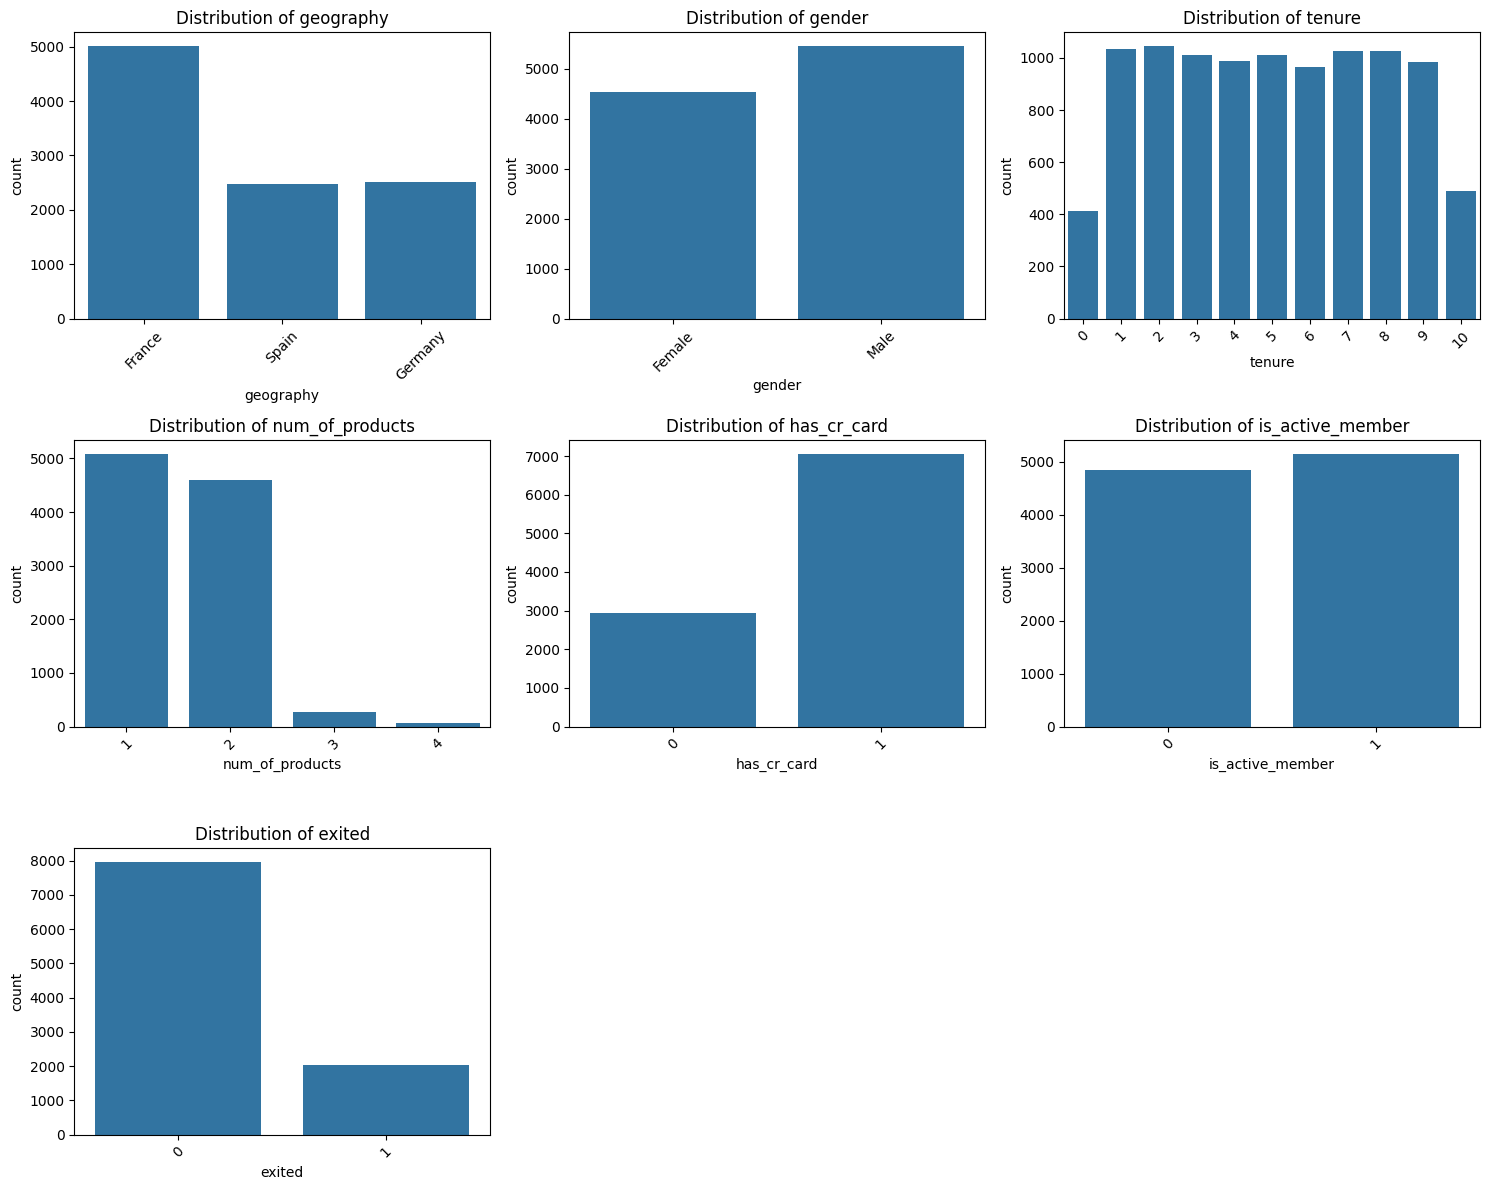

In [300]:
# 3.1.2. Visualizations: Bar charts
def plot_categorical_barplots(df, categorical_columns):
    """
    Generates bar plots for each categorical column in the DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        categorical_columns (list): A list of categorical column names for which to generate the bar plots.
    """
    # Determine the number of rows and columns for the subplots
    num_plots = len(categorical_columns)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)
    
    plt.figure(figsize=(num_cols * 5, num_rows * 4))
    
    for i, col in enumerate(categorical_columns):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.countplot(data=df, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


categorical_columns = ['geography', 'gender', 'tenure', 'num_of_products','has_cr_card', 'is_active_member', 'exited']
plot_categorical_barplots(df, categorical_columns)


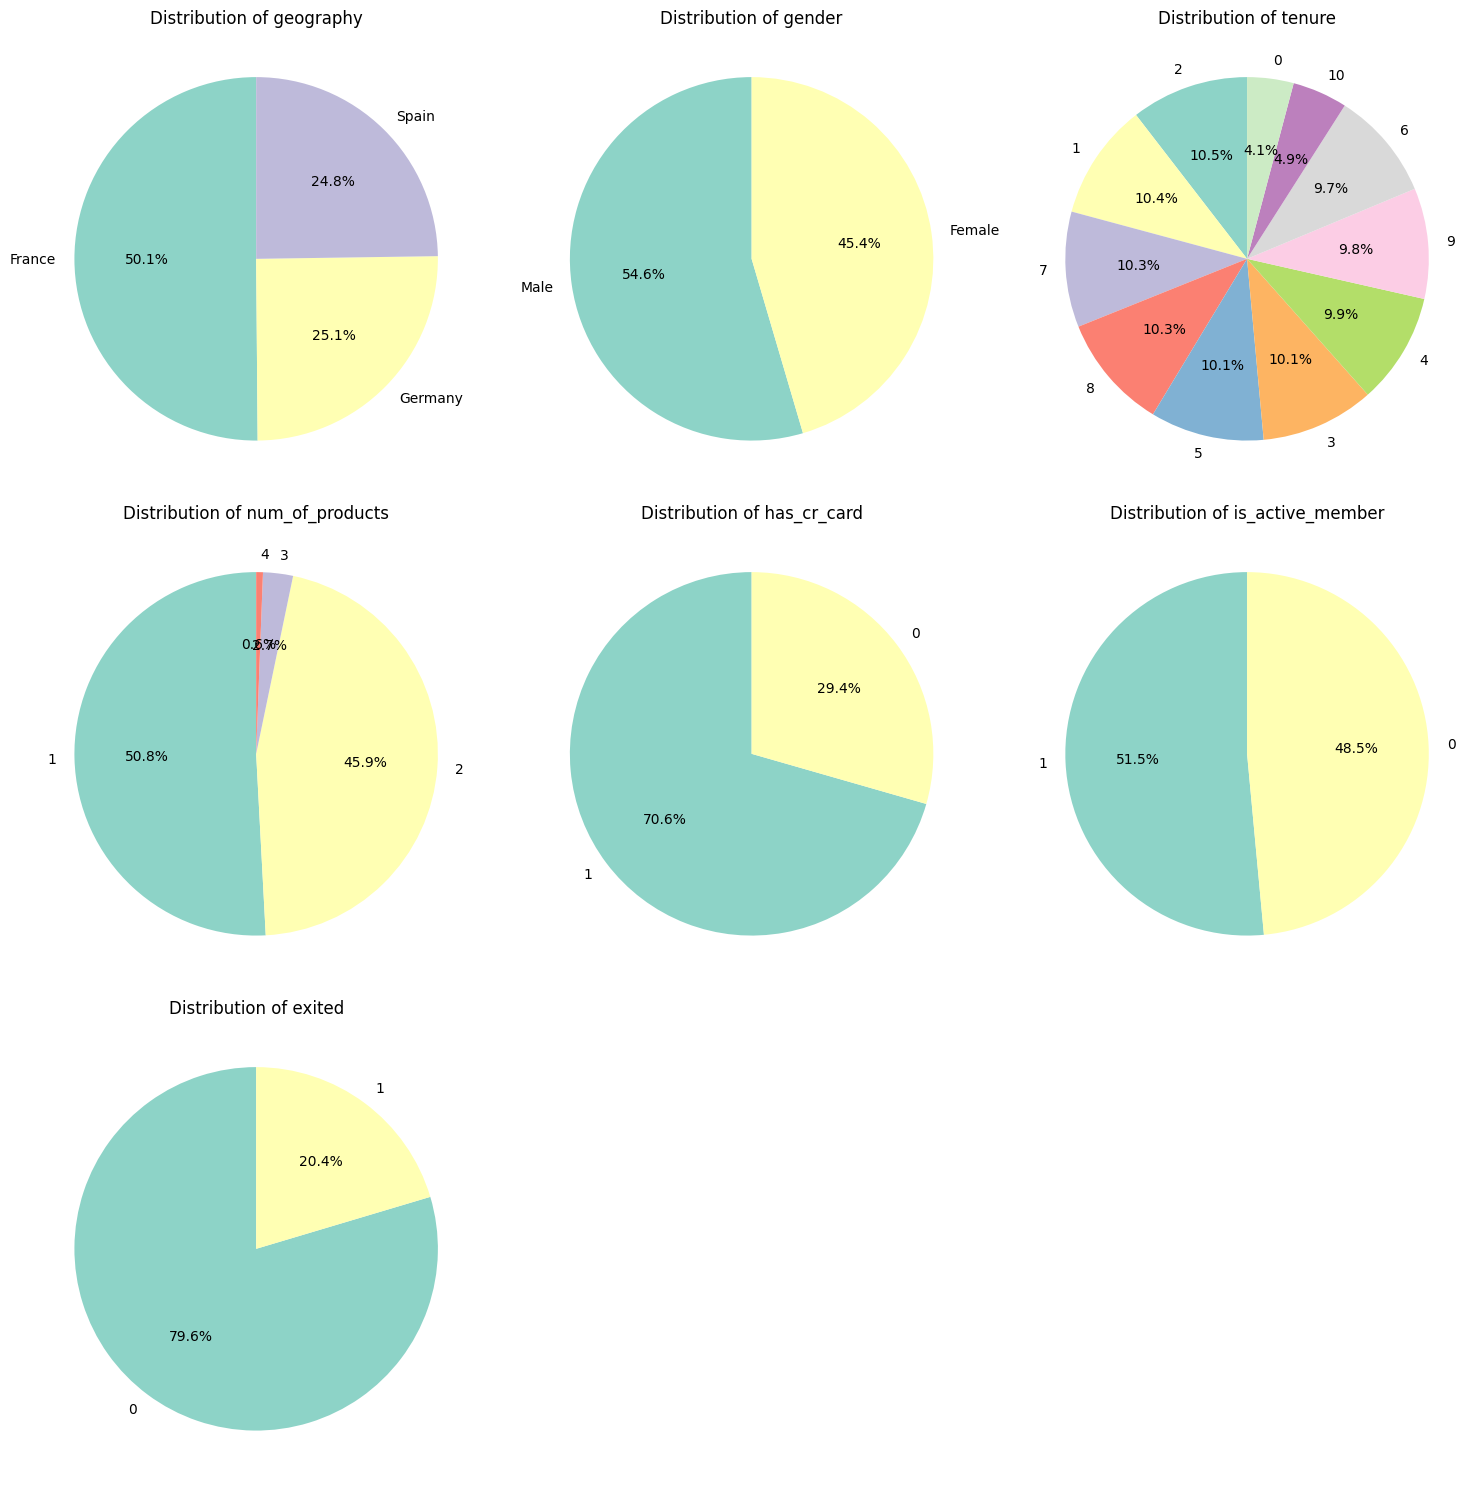

In [301]:
# 3.1.2. Visualizations: Pie charts:
def plot_categorical_pie_charts(df, categorical_columns):
    """
    Generates pie charts for each categorical column in the DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        categorical_columns (list): A list of categorical column names for which to generate the pie charts.
    """
    # Determine the number of rows and columns for the subplots
    num_plots = len(categorical_columns)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)
    
    plt.figure(figsize=(num_cols * 5, num_rows * 5))
    
    for i, col in enumerate(categorical_columns):
        plt.subplot(num_rows, num_cols, i + 1)
        df[col].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set3"), startangle=90)
        plt.title(f'Distribution of {col}')
        plt.ylabel('')  # Hide the y-label for better aesthetics
    
    plt.tight_layout()
    plt.show()

categorical_columns = ['geography', 'gender', 'tenure', 'num_of_products','has_cr_card', 'is_active_member', 'exited']
plot_categorical_pie_charts(df, categorical_columns)


#### 3.2. Numerical variables:

In [302]:
# 3.2.1. Summary Statistics. Measures of centrality: Mean, median, mode.
# 3.2.2. Summary Statistics. Measures of dispersion: Variance, standard deviation, minimum, maximum, range, quantiles.
def summary_statistics(df):
    # Print summary statistics for numerical columns
    print("\nSummary Statistics:\n")
    return pd.DataFrame(df.describe())
    
summary_statistics(df_numerical)


Summary Statistics:



,row_number,customer_id,credit_score,age,balance,estimated_salary
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,76491.112875,100083.331145
std,2887.472338,7.193177e+04,96.661615,10.487200,62393.474144,57508.117802
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,11.580000
25%,2501.250000,1.562852e+07,584.000000,32.000000,0.000000,50983.750000
50%,5001.500000,1.569073e+07,652.000000,37.000000,97198.540000,100185.240000
75%,7501.750000,1.575323e+07,718.000000,44.000000,127647.840000,149383.652500
max,10000.000000,1.581569e+07,850.000000,92.000000,250898.090000,199992.480000


#### 3.2.3. Shape of the distribution: Skewness(asymmetry) and kurtosis("tailedness" how peaked the distribution is).


**Interpretation**
1. **Skewness (shape of the distribution)**
 - Skewness = 0: Symmetrical distribution (No action needed).
 - Skewness > 0: Right-skewed (Consider log or square root transformation).
 - Skewness < 0: Left-skewed (Consider inverse or square transformation).
 - -0.5 to 0.5: Fairly symmetrical (Generally acceptable).
 - -1 to -0.5 or 0.5 to 1: Moderately skewed (Might require transformation).
 - <-1 or >1: Highly skewed (Transformation recommended).

2. **Kurtosis (outliers)**
 - Kurtosis = 3: Normal distribution (No action needed).
 - Kurtosis > 3: Heavy tails (Check for outliers, consider robust methods).
 - Kurtosis < 3: Light tails (Typically acceptable, fewer outliers).

In [303]:
# 3.2.3. Shape of the distribution: Skewness(asymmetry) and kurtosis("tailedness" how peaked the distribution is).
def calculate_skewness_kurtosis(df):
    """
    Calculates skewness and kurtosis for each column in the DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
    
    Returns:
        pd.DataFrame: A DataFrame containing skewness and kurtosis for each column.
    """
    results = {'Column': [], 'Skewness': [], 'Kurtosis': []}
    
    for column in df.columns:
        skewness = round(df[column].skew(), 2)
        kurtosis = round(df[column].kurtosis(), 2)
        
        results['Column'].append(column)
        results['Skewness'].append(skewness)
        results['Kurtosis'].append(kurtosis)
    
    return pd.DataFrame(results)

calculate_skewness_kurtosis(df_numerical)

,Column,Skewness,Kurtosis
0,row_number,-0.00,-1.20
1,customer_id,0.00,-1.20
2,credit_score,-0.07,-0.43
3,age,1.01,1.40
4,balance,-0.14,-1.49
5,estimated_salary,0.00,-1.18


#### 3.2.4. Visualizations: Histograms (the frequency distribution of a dataset), box plots

array([[<Axes: title={'center': 'row_number'}>,
        <Axes: title={'center': 'customer_id'}>],
       [<Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'estimated_salary'}>]], dtype=object)

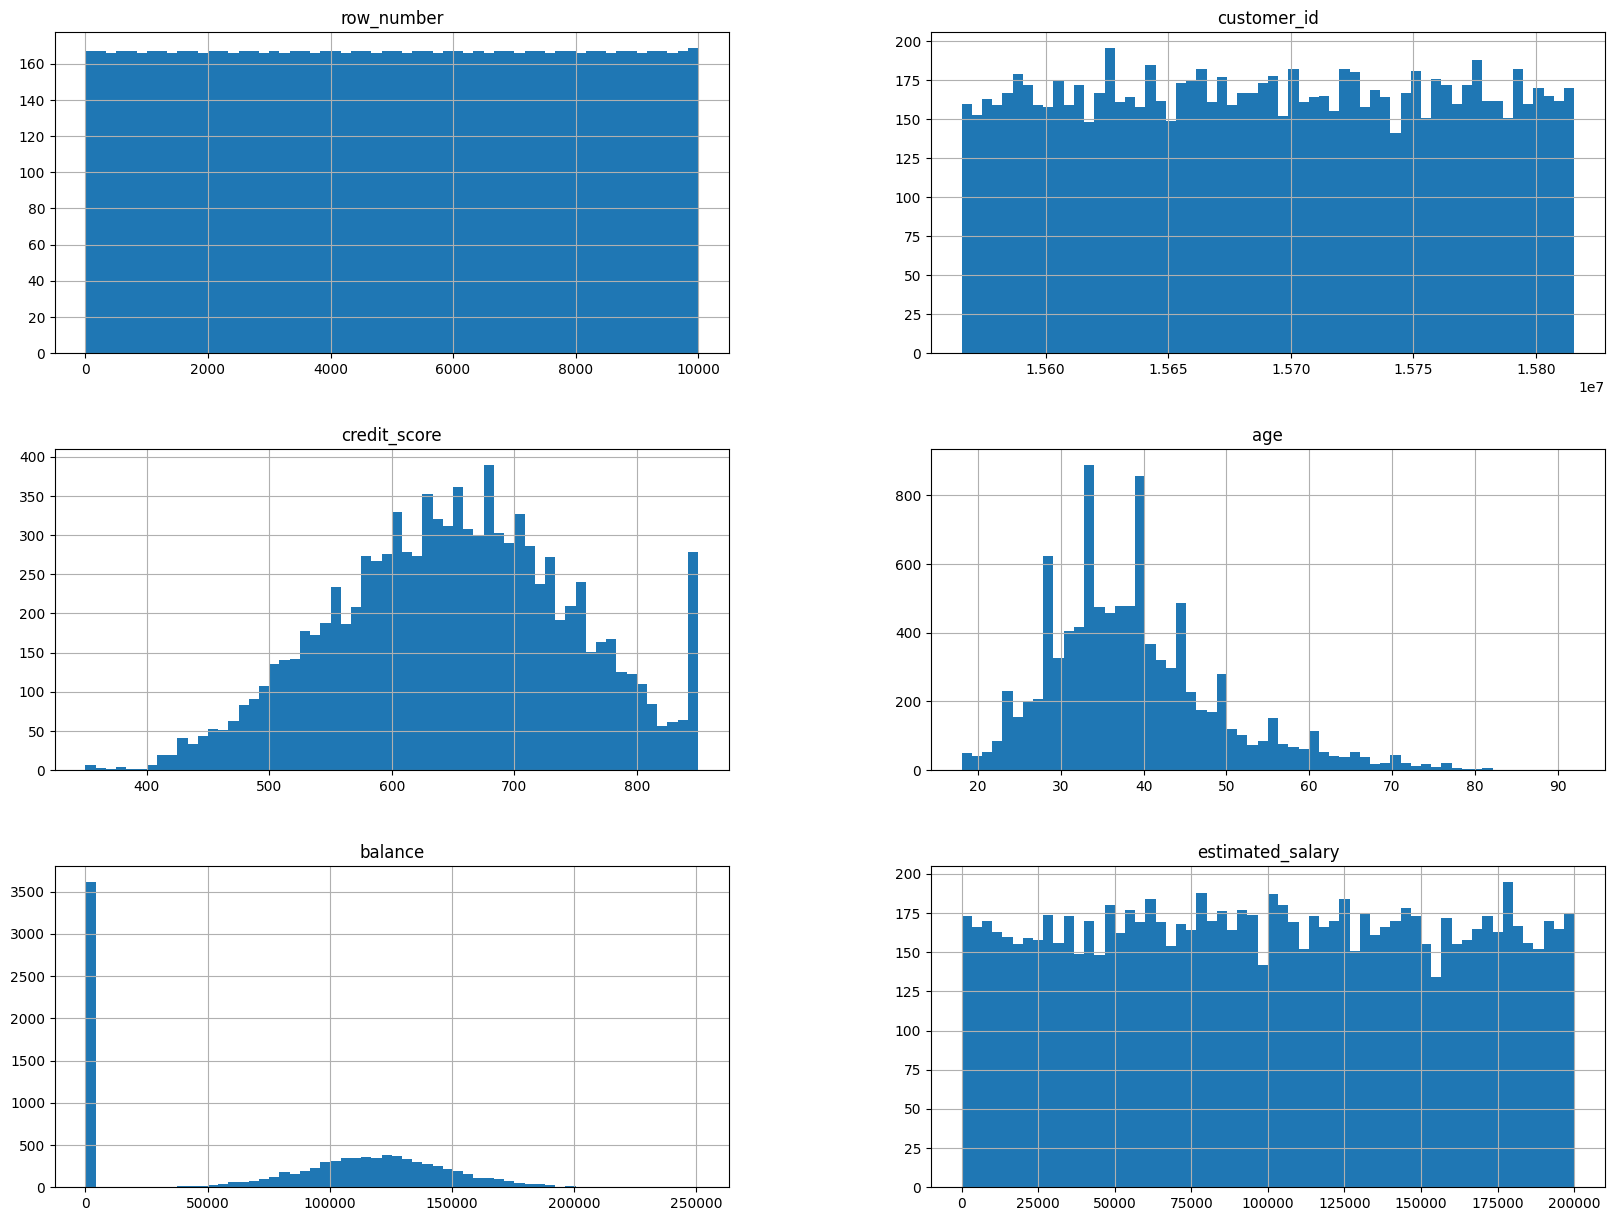

In [304]:
# 3.2.4. Visualizations: Histograms
#Histograms display the frequency distribution of a dataset. The height of each bar represents the number of data points in each bin.
df_numerical.hist(figsize=(20, 15), bins=60, xlabelsize=10, ylabelsize=10)


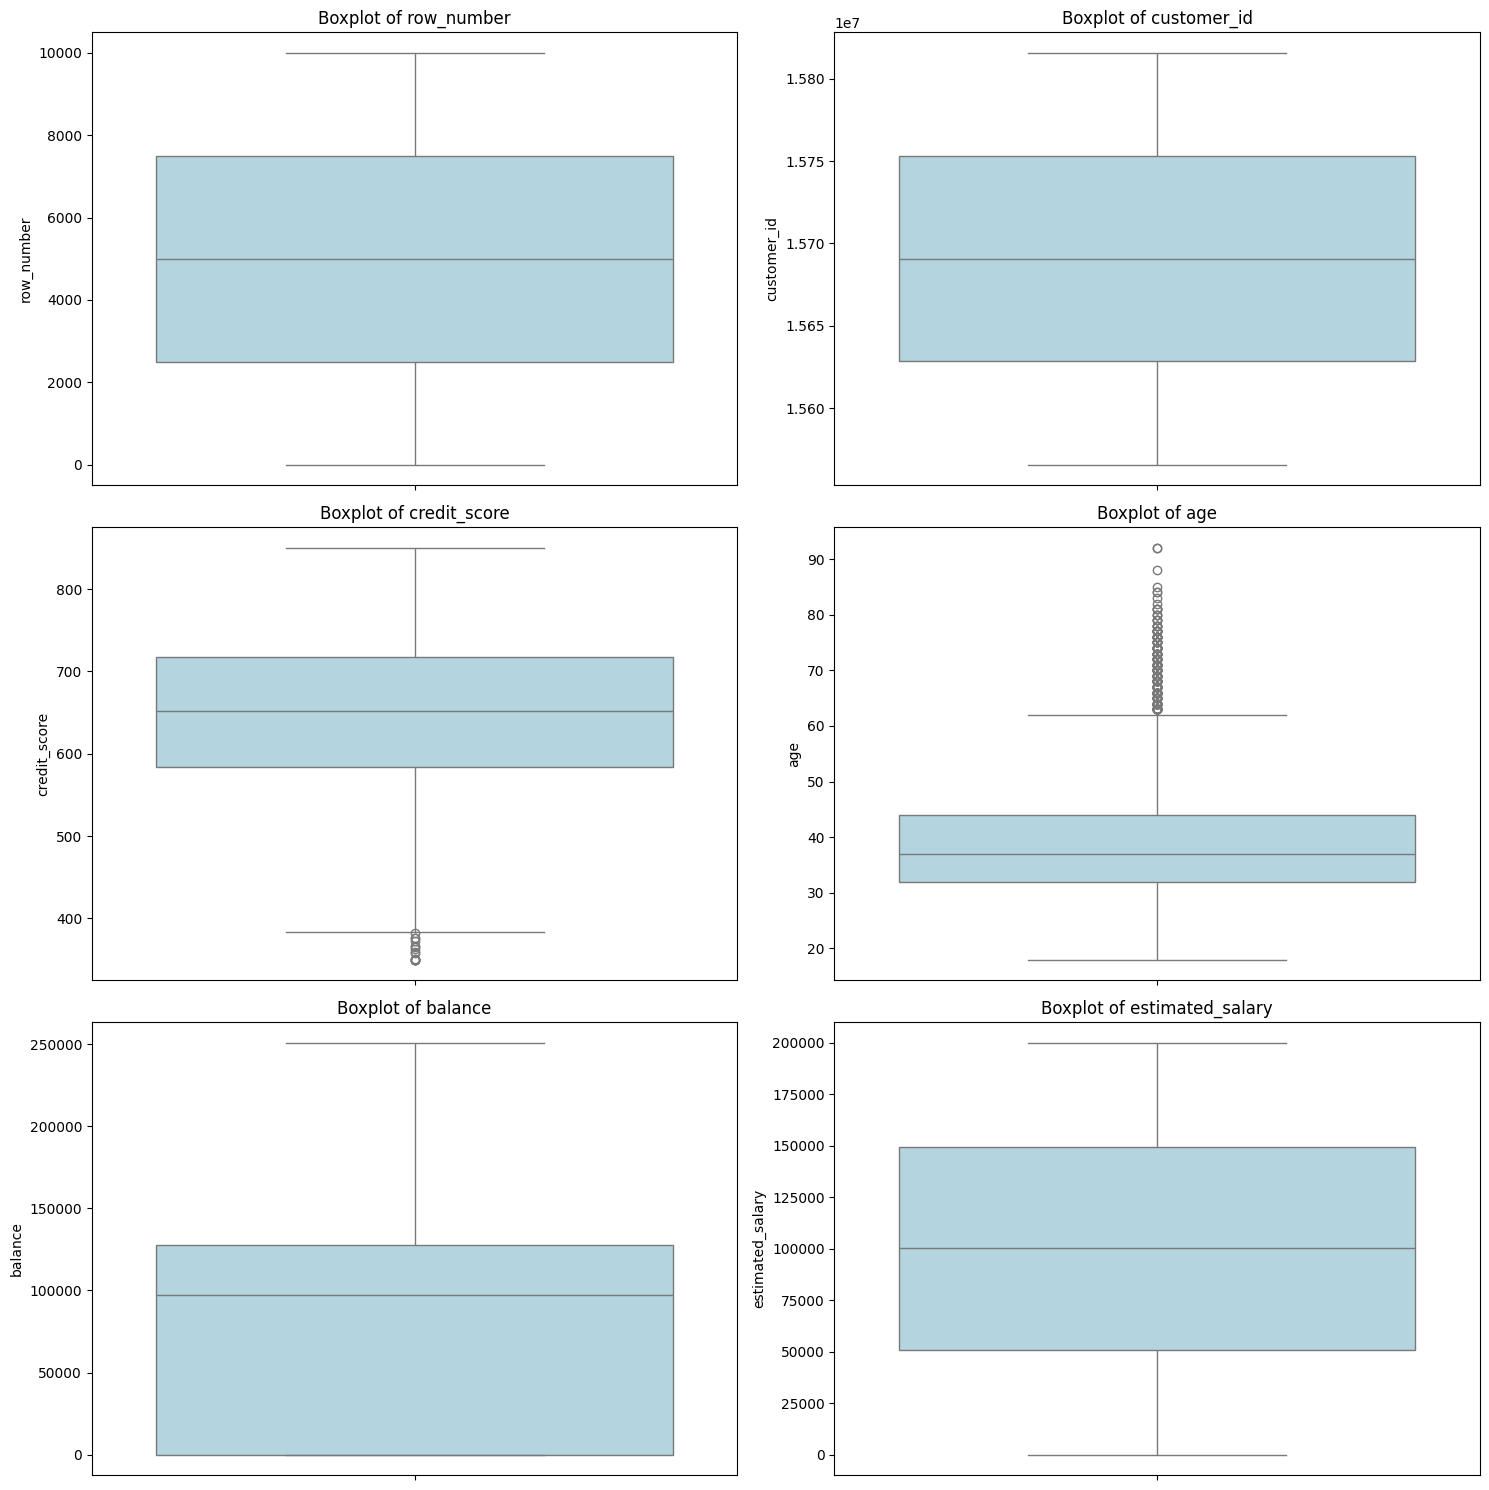

In [305]:
# 3.2.4. Visualizations: box plots.
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots(df):
    """
    Generates boxplots for each column in a DataFrame, arranged with 2 plots per row.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the numerical data.
    """
    num_cols = 2  # Number of plots per row
    num_rows = 3  # Total number of rows
    total_plots = num_cols * num_rows
    
    plt.figure(figsize=(15, num_rows * 5))  # Adjust the figure size based on the number of rows
    
    for i, column in enumerate(df.columns[:total_plots], 1):  # Limit to the first 6 columns
        plt.subplot(num_rows, num_cols, i)
        sns.boxplot(data=df[column], color="lightblue")
        plt.title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()

plot_boxplots(df_numerical)

**Univariate Analysis Summary:**
- "age" col needs logarithmic or square root transformation to address the positive skewness to normalize it. (Before Splitting Data into Training and Test Sets)
- "balance" right skewness Logarithmic Transformation or Square Root Transformation
- "credit_score" normalize the feature to scale it to a standard range. Or Logarithmic Transformation or Square Root Transformation
- df['credit_score_sqrt'] = np.sqrt(df['credit_score'])
- df['credit_score_log'] = np.log1p(df['credit_score'])

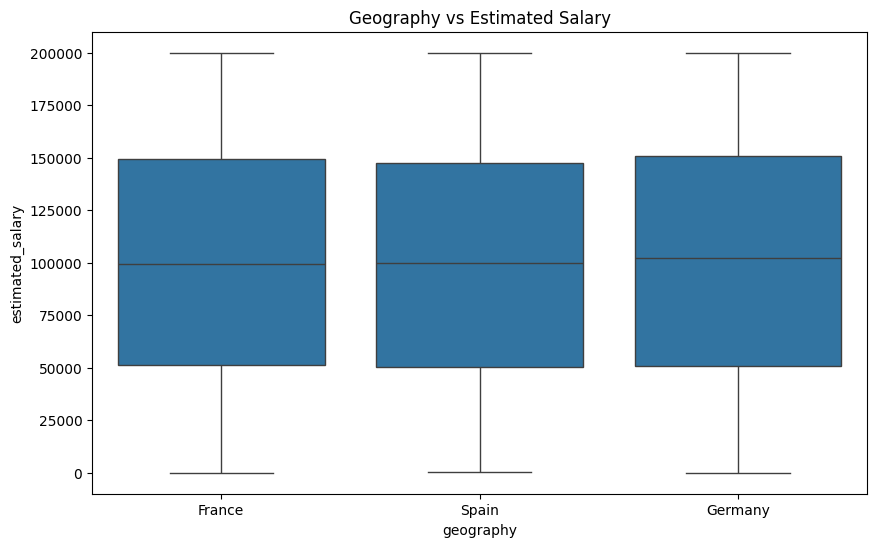

In [306]:
# Bivariate Analysis: Categorical vs Numerical (e.g., 'geography' vs 'estimated_salary')
plt.figure(figsize=(10, 6))
sns.boxplot(x='geography', y='estimated_salary', data=df)
plt.title('Geography vs Estimated Salary')
plt.show()

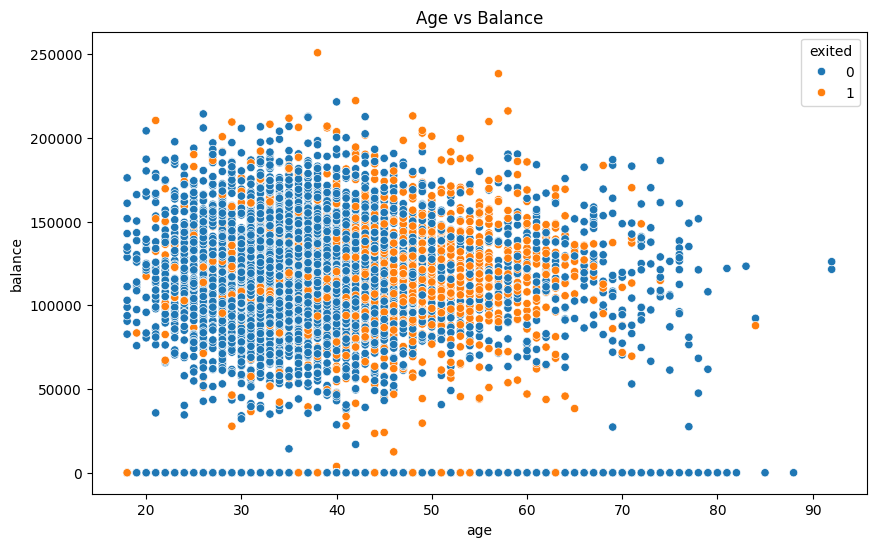

In [307]:
# Bivariate Analysis: Numerical vs Numerical (e.g., 'age' vs 'balance')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='balance', data=df, hue='exited')
plt.title('Age vs Balance')
plt.show()

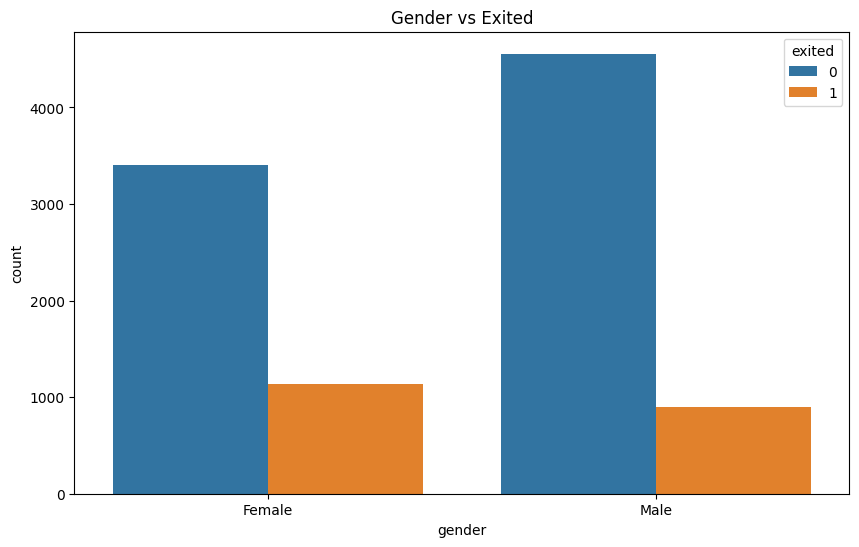

In [308]:
# Bivariate Analysis: Categorical vs Categorical (e.g., 'gender' vs 'exited')
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='exited', data=df)
plt.title('Gender vs Exited')
plt.show()